In [1]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats
import seaborn as sns

In [2]:
!pip install textblob
from textblob import TextBlob

def evaluate_TextBlob_polarity(text_str):
    text_polarity = TextBlob(text_str).sentiment.polarity
    return text_polarity

def evaluate_TextBlob_subjectivity(text_str):
    text_subjectivity = TextBlob(text_str).sentiment.subjectivity
    return text_subjectivity

In [3]:
def func_source_subject(df, source, subject):

    # df_data = df_cryptonews.loc([(df_cryptonews['source'] == source) & (df_cryptonews['subject'] == subject)])
    df_source = df[df['source'] == source]
    df_source_subject = df_source[df_source['subject'] == subject]

    return df_source_subject

In [8]:
# Let's focus on bitcoin for now
df_bitcoin = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\bitcoin.csv", parse_dates=['date'])
# df_BTC['date'] = pd.to_datetime(df_BTC['date'])
df_bitcoin['date'] = pd.to_datetime(df_bitcoin['date'], format='ISO8601')
df_bitcoin['date'] = df_bitcoin['date'].dt.date
df_bitcoin

,date,price,total_volume,market_cap,coin_name
0,2015-01-01,313.992000,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02,314.446000,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03,286.572000,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04,260.936000,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05,273.220000,1.550381e+08,3.740880e+09,bitcoin
...,...,...,...,...,...
3368,2024-03-23,63509.044965,4.243660e+10,1.247366e+12,bitcoin
3369,2024-03-24,64285.802791,2.548993e+10,1.264722e+12,bitcoin
3370,2024-03-25,67310.983268,2.809832e+10,1.323456e+12,bitcoin
3371,2024-03-26,69938.945302,4.482031e+10,1.371797e+12,bitcoin


In [9]:
# Let's keep things simple, let's just analyze the close price daily
df_BTC = df_bitcoin[['date', 'price']].copy()

df_BTC['Bitcoin_USD'] = df_BTC['price']

df_BTC = df_BTC[['date', 'Bitcoin_USD']]

display(df_BTC)

,date,Bitcoin_USD
0,2015-01-01,313.992000
1,2015-01-02,314.446000
2,2015-01-03,286.572000
3,2015-01-04,260.936000
4,2015-01-05,273.220000
...,...,...
3368,2024-03-23,63509.044965
3369,2024-03-24,64285.802791
3370,2024-03-25,67310.983268
3371,2024-03-26,69938.945302


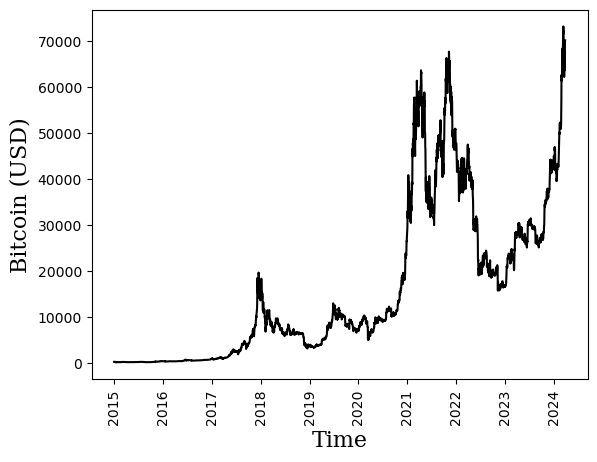

In [10]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

# plt.plot(df_BTC['price'])
x = df_BTC['date']
y = df_BTC['Bitcoin_USD'] # daily close price of BTC

plt.plot(x, y, 'k')
plt.xlabel('Time', fontdict=font)
plt.xticks(rotation='vertical')
plt.ylabel('Bitcoin (USD)', fontdict=font)


plt.show()

In [20]:
# Load data
# df_cryptonews = pd.read_csv("/kaggle/input/crypto-news/cryptonews.csv", parse_dates=['date'])
df_cryptonews = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\cryptonews.csv")
df_cryptonews['date'] = pd.to_datetime(df_cryptonews['date'], format='ISO8601')
# df_cryptonews['date'] = df_cryptonews['date'].dt.date

# Display data
df_cryptonews

,date,sentiment,source,subject,text,title,url
0,2023-12-19 06:40:41,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...
1,2023-12-19 06:03:24,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...
2,2023-12-19 05:55:14,"{'class': 'positive', 'polarity': 0.05, 'subje...",CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...
3,2023-12-19 05:35:26,"{'class': 'positive', 'polarity': 0.5, 'subjec...",CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...
4,2023-12-19 05:31:08,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...
...,...,...,...,...,...,...,...
31032,2021-10-27 15:17:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,defi,Cream Finance (CREAM) suffered another flash l...,Cream Finance Suffers Another Exploit as Attac...,https://cryptonews.com/news/cream-finance-suff...
31033,2021-10-19 13:39:00,"{'class': 'positive', 'polarity': 0.1, 'subjec...",CryptoNews,blockchain,Banque de France disclosed the results of its ...,French Central Bank's Blockchain Bond Trial Br...,https://cryptonews.com/news/french-central-ban...
31034,2021-10-18 13:58:00,"{'class': 'positive', 'polarity': 0.14, 'subje...",CryptoNews,blockchain,Advancing its project to become \x9caÂ\xa0meta...,"Facebook To Add 10,000 Jobs In EU For Metavers...",https://cryptonews.com/news/facebook-to-add-10...
31035,2021-10-15 00:00:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,Chinese companies are still topping the blockc...,Tech Crackdown Hasn't Halted Chinese Firms' Bl...,https://cryptonews.com/news/tech-crackdown-has...


In [21]:
sources = np.sort(df_cryptonews['source'].unique())
subjects = np.sort(df_cryptonews['subject'].unique())

# sources = ['CoinTelegraph' 'CryptoNews' 'CryptoPotato']
# subjects = ['altcoin' 'bitcoin' 'blockchain' 'defi' 'ethereum' 'nft']

print('sources =', sources)
print('subjects =', subjects)
sources = ['CoinTelegraph' 'CryptoNews' 'CryptoPotato']
subjects = ['altcoin' 'bitcoin' 'blockchain' 'defi' 'ethereum' 'nft']

sources = ['CoinTelegraph' 'CryptoNews' 'CryptoPotato']
subjects = ['altcoin' 'bitcoin' 'blockchain' 'defi' 'ethereum' 'nft']


In [22]:
df_cryptonews['TextBlob_polarity_title'] = df_cryptonews['title'].apply(lambda x:evaluate_TextBlob_polarity(x))
df_cryptonews['TextBlob_polarity_headline'] = df_cryptonews['text'].apply(lambda x:evaluate_TextBlob_polarity(x))
df_cryptonews['TextBlob_polarity'] = df_cryptonews[['TextBlob_polarity_title', 'TextBlob_polarity_headline']].mean(axis=1)

df_cryptonews['TextBlob_subjectivity_title'] = df_cryptonews['title'].apply(lambda x:evaluate_TextBlob_subjectivity(x))
df_cryptonews['TextBlob_subjectivity_headline'] = df_cryptonews['text'].apply(lambda x:evaluate_TextBlob_subjectivity(x))
df_cryptonews['TextBlob_subjectivity'] = df_cryptonews[['TextBlob_subjectivity_title', 'TextBlob_subjectivity_headline']].mean(axis=1)

In [23]:
display(df_cryptonews)

,date,sentiment,source,subject,text,title,url,TextBlob_polarity_title,TextBlob_polarity_headline,TextBlob_polarity,TextBlob_subjectivity_title,TextBlob_subjectivity_headline,TextBlob_subjectivity
0,2023-12-19 06:40:41,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...,0.000000,-0.100000,-0.050000,0.000000,0.600000,0.300000
1,2023-12-19 06:03:24,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...,-0.133333,0.000000,-0.066667,0.600000,0.000000,0.300000
2,2023-12-19 05:55:14,"{'class': 'positive', 'polarity': 0.05, 'subje...",CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...,0.416667,0.050000,0.233333,0.500000,0.050000,0.275000
3,2023-12-19 05:35:26,"{'class': 'positive', 'polarity': 0.5, 'subjec...",CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...,-0.283333,0.500000,0.108333,0.283333,0.900000,0.591667
4,2023-12-19 05:31:08,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31032,2021-10-27 15:17:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,defi,Cream Finance (CREAM) suffered another flash l...,Cream Finance Suffers Another Exploit as Attac...,https://cryptonews.com/news/cream-finance-suff...,-0.600000,0.000000,-0.300000,0.700000,0.000000,0.350000
31033,2021-10-19 13:39:00,"{'class': 'positive', 'polarity': 0.1, 'subjec...",CryptoNews,blockchain,Banque de France disclosed the results of its ...,French Central Bank's Blockchain Bond Trial Br...,https://cryptonews.com/news/french-central-ban...,0.083333,0.100000,0.091667,0.194444,0.400000,0.297222
31034,2021-10-18 13:58:00,"{'class': 'positive', 'polarity': 0.14, 'subje...",CryptoNews,blockchain,Advancing its project to become \x9caÂ\xa0meta...,"Facebook To Add 10,000 Jobs In EU For Metavers...",https://cryptonews.com/news/facebook-to-add-10...,0.000000,0.136364,0.068182,0.000000,0.454545,0.227273
31035,2021-10-15 00:00:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,Chinese companies are still topping the blockc...,Tech Crackdown Hasn't Halted Chinese Firms' Bl...,https://cryptonews.com/news/tech-crackdown-has...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
for i in np.arange(len(sources)):
    for j in np.arange(len(subjects)):

        source = sources[i]
        subject = subjects[j] 

        df_source_subject = func_source_subject(df_cryptonews,source,subject)

        df_source_subject_subjectivity = df_source_subject[['date','TextBlob_polarity','TextBlob_subjectivity']]
        
        df_source_subject_daily_dataset = df_source_subject_subjectivity.groupby(df_source_subject['date'].dt.date).agg({
                'TextBlob_polarity': 'mean',
                'TextBlob_subjectivity': 'mean'
            }).reset_index()
        
        df_source_subject_daily_dataset.columns= df_source_subject_daily_dataset.columns.str.replace('TextBlob',source + "_" + subject,regex=True)
        
        if (i == 0) & (j == 0):
            df_subject_daily_dataset_merged_outer = df_BTC # df_source_subject_daily_dataset
        else:
            df_subject_daily_dataset_merged_outer = pd.merge(df_subject_daily_dataset_merged_outer,df_source_subject_daily_dataset, on='date', how='outer').sort_values(by=['date']).reset_index(drop=True)
        
df_subject_daily_dataset_merged_outer = df_subject_daily_dataset_merged_outer.fillna(0)

df_subject_daily_dataset_merged_BTC_outer = pd.merge(df_subject_daily_dataset_merged_outer, df_BTC, on='date', how='inner')

display(df_subject_daily_dataset_merged_BTC_outer)

,date,Bitcoin_USD_x,Bitcoin_USD_y
0,2015-01-01,313.992000,313.992000
1,2015-01-02,314.446000,314.446000
2,2015-01-03,286.572000,286.572000
3,2015-01-04,260.936000,260.936000
4,2015-01-05,273.220000,273.220000
...,...,...,...
3368,2024-03-23,63509.044965,63509.044965
3369,2024-03-24,64285.802791,64285.802791
3370,2024-03-25,67310.983268,67310.983268
3371,2024-03-26,69938.945302,69938.945302


In [51]:
####
B = df_subject_daily_dataset_merged_BTC_outer['Bitcoin_USD_x']

Dates = df_subject_daily_dataset_merged_outer['date']

NameError: name 'Date' is not defined

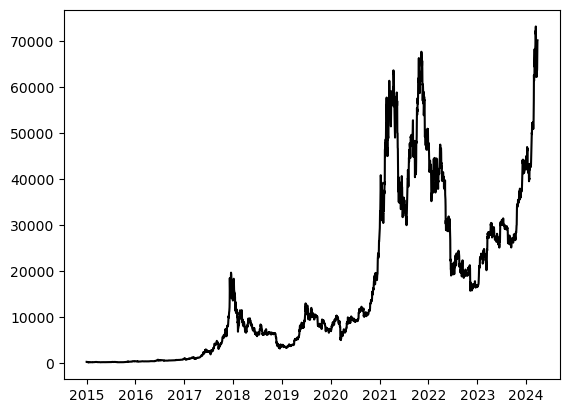

In [53]:
plt.figure()
plt.plot(Dates,B,'k',label = 'Bitcoin price (USD)')
plt.plot(Date,70000*B1,'r',label = 'CryptoPotato_nft_polarity')
plt.ylabel('USD')
plt.xticks(rotation='vertical')
plt.legend()
plt.show

In [32]:
import math

from sklearn.preprocessing import MinMaxScaler

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [33]:
A = df_subject_daily_dataset_merged_BTC_outer.drop(columns = ['date'])
B = df_subject_daily_dataset_merged_BTC_outer['Bitcoin_USD_x']


In [34]:
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(A).reshape(-1,1))
print(closedf.shape)

stepB = round(closedf.shape[0]/B.shape[0])
display(stepB)

(6746, 1)


2

In [35]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (4047, 1)
test_data:  (2699, 1)


In [36]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [37]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (4031, 15)
y_train:  (4031,)
X_test:  (2683, 15)
y_test (2683,)


In [38]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (4031, 15, 1)
X_test:  (2683, 15, 1)


In [39]:
# Actuall Model Building

model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32,verbose=1)

Epoch 1/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0036 - val_loss: 0.0623
Epoch 2/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2939e-04 - val_loss: 0.0102
Epoch 3/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.9798e-05 - val_loss: 0.0100
Epoch 4/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.8027e-05 - val_loss: 0.0099
Epoch 5/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.8321e-05 - val_loss: 0.0101
Epoch 6/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.6159e-05 - val_loss: 0.0091
Epoch 7/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.1151e-05 - val_loss: 0.0097
Epoch 8/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6205e-05 - val_loss: 0.0079
Epoch 9/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.5162e-05 - val_loss: 0.0087
Epoch 10/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.4703e-05 - val_loss: 0.0072
Epoch 11/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.6866e-05 - val_loss: 0.0077
Epoch 12/20


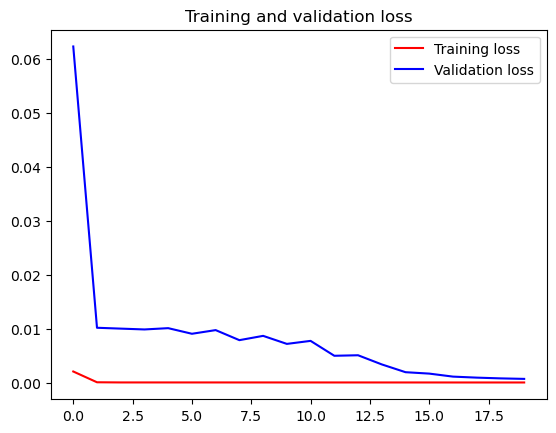

<Figure size 640x480 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [42]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


((4031, 1), (2683, 1))

In [43]:
# Model Evaluation

# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [44]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  329.0276246794971
Train data MSE:  108259.17780223198
Train data MAE:  155.182938905114
-------------------------------------------------------------------------------------
Test data RMSE:  1913.7144237044554
Test data MSE:  3662302.895494476
Test data MAE:  1472.2777256469665


In [45]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9934371173990576
Test data explained variance regression score: 0.9870451908606704


In [46]:
## R square score for regression

print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9934288497041864
Test data R2 score: 0.9823260494804391


In [47]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original price','Train predicted price','Test predicted price'])

Train predicted data:  (6746, 1)
Test predicted data:  (6746, 1)
